Description of observations:

1) Fox news is the most neutral when it comes to tweeting. very surprising.

2) BBC has the most positive tweets.

3) NYT has the most negative tweets

In [1]:
#!pip install VaderSentiment

In [1]:
import tweepy 
import json
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
original_working_directory = os.getcwd()
original_working_directory

'C:\\Users\\c00778\\gwu-arl-data-pt-03-2020-u-c\\02-Homework\\06-Python-APIs\\Twitter-API-Instructions'

In [3]:
os.chdir(os.path.join('..','..','..'))

In [4]:
new_working_dir = os.getcwd()
new_working_dir

'C:\\Users\\c00778\\gwu-arl-data-pt-03-2020-u-c'

In [5]:
from config import consumer_key,consumer_secret,access_token,access_token_secret

In [6]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [7]:
user_account = ['BBC','CBSNews','CNN','FoxNews','nytimes']

tweet_list = []

name = []
tweet_id = []
favorite_count = []
full_text = []
date_time = []

for agency in user_account:
    public_tweets = tweepy.Cursor(api.user_timeline, agency, tweet_mode='extended').items(100)
    for tweet in public_tweets:
        tweet_list.append(tweet)

In [8]:
for tweet in tweet_list:
    tweet_id.append(tweet.id)
    favorite_count.append(tweet.favorite_count)
    full_text.append(tweet.full_text)
    name.append(tweet.author.name)
    date_time.append(tweet.created_at)

In [9]:
tweets_df = pd.DataFrame({
    'Tweet ID': tweet_id,
    'name':name,
    'date&time':date_time,
    'Tweet Text': full_text,
    'Favorite Count': favorite_count    
    })

In [10]:
tweets_df.head()

,Tweet ID,name,date&time,Tweet Text,Favorite Count
0,1264224821493157890,BBC,2020-05-23 16:01:00,#FindingDory = perfect weekend film! 🙌🐠\n\n6...,32
1,1264209722007343104,BBC,2020-05-23 15:01:00,We hope this brings you some much needed tranq...,67
2,1264179523194703872,BBC,2020-05-23 13:01:00,"""If any good can come of me sharing my experie...",33
3,1264176066379296768,BBC,2020-05-23 12:47:16,RT @BBCTheOneShow: In support of #MentalHealth...,0
4,1264164423763025920,BBC,2020-05-23 12:01:00,Israeli investors develop face mask with remot...,44


In [11]:
base_name = tweets_df.loc[0,'name']
counter = 0 

for index, tweet_row in tweets_df.iterrows():  
    if tweet_row['name'] == base_name:
        tweets_df.loc[index,'tweets_ago'] = counter
        counter +=1
    if tweet_row['name'] != base_name:
        counter = 0    
        tweets_df.loc[index,'tweets_ago'] = counter
        base_name = tweet_row['name']
        counter +=1
        

In [12]:
for index, row in tweets_df.iterrows():
    tweet = row['Tweet Text']
    results = analyzer.polarity_scores(f'{tweet}')
    tweets_df.loc[index,'compound'] = results['compound']
    tweets_df.loc[index, 'positive'] = results['pos']
    tweets_df.loc[index,'neutral'] = results['neu']
    tweets_df.loc[index,'negative'] = results['neg']   
    

In [18]:
tweets_df.to_csv('tweets_df.csv')

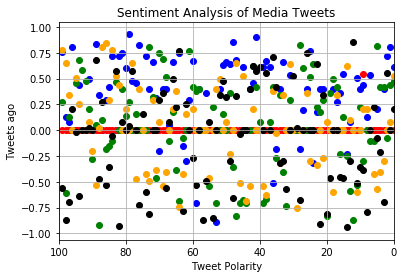

In [19]:
x = tweets_df.iloc[0:100,5]

bbc_points = tweets_df['name'] == 'BBC'
cnn_points = tweets_df['name'] == 'CNN'
cbs_points = tweets_df['name'] == 'CBS News'
fox_points = tweets_df['name'] == 'Fox News'
nyt_points = tweets_df['name'] == 'The New York Times'

bbc = tweets_df.loc[bbc_points]
cnn = tweets_df.loc[cnn_points]
cbs = tweets_df.loc[cbs_points]
fox = tweets_df.loc[fox_points]
nyt = tweets_df.loc[nyt_points]


bbc = bbc['compound']
cnn = cnn['compound']
cbs = cbs['compound']
fox = fox['compound']
nyt = nyt['compound']

plt.scatter(x,bbc,color='blue')
plt.scatter(x,fox,color='red')
plt.scatter(x,cnn,color='green')
plt.scatter(x,cbs,color='orange')
plt.scatter(x,nyt,color='black')

plt.title('Sentiment Analysis of Media Tweets')
plt.xlabel('Tweet Polarity')
plt.xlim(100,0)
plt.ylabel('Tweets ago')

plt.grid(True)
plt.savefig('sentiment_scatter.png')

In [20]:
grpby_name = tweets_df.groupby(['name'])
mean_df = grpby_name.mean()
mean_df = mean_df.reset_index()
mean_df.iloc[1,0] = 'CBS'
mean_df.iloc[3,0] = 'Fox'
mean_df.iloc[4,0] = 'NYT'

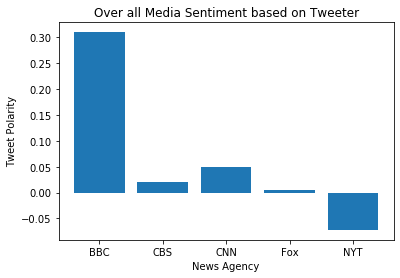

In [21]:
x = mean_df['name']
y = mean_df['compound']

plt.bar(x,y)
plt.xlabel('News Agency')
plt.ylabel('Tweet Polarity')
plt.title('Over all Media Sentiment based on Tweeter')


plt.savefig('sentiment_barchart.png')